<a href="https://colab.research.google.com/github/S-Tissera/CM2604_/blob/main/CM2604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Understanding the Dataset**





In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the dataset
bank_marketing = fetch_ucirepo(id=222)

# Data (as pandas DataFrames)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Combine features and target into a single DataFrame for easier analysis
data = pd.concat([X, y], axis=1)

# Display Metadata
print("Metadata:")
print(bank_marketing.metadata)

# Display Variable Information
print("\nVariable Information:")
print(bank_marketing.variables)

# Show the first few rows
print("\nFirst Few Rows:")
print(data.head())

# Basic Information
print("\nDataset Info:")
print(data.info())

# Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

# Statistical Summary
print("\nStatistical Summary:")
print(data.describe())


Metadata:
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to pre

# **2. Cleaning Dataset**

***Handling Missing Values***


In [ ]:
print("\nChecking Missing Values:")
print(data.isnull().sum())

# Fill missing values for numerical features with mean
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mean())  # Reassign to avoid inplace=True

# Fill missing values for categorical features with mode
for col in data.select_dtypes(include=['object']).columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])  # Reassign to avoid inplace=True

print("\nMissing Values after Cleaning:")
print(data.isnull().sum())



Checking Missing Values:
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

Missing Values after Cleaning:
age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


***Remove Duplicates***

In [ ]:
print("\nChecking for Duplicates:")
print(f"Duplicate Rows: {data.duplicated().sum()}")

# Drop duplicates
data.drop_duplicates(inplace=True)

print(f"Duplicate Rows after Removal: {data.duplicated().sum()}")


Checking for Duplicates:
Duplicate Rows: 0
Duplicate Rows after Removal: 0


***Handle Outliers using IQR***

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("\nDataset Shape after Outlier Removal:")
print(data.shape)


Dataset Shape after Outlier Removal:
(28069, 17)


***Encode Categorical Variables***

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nEncoding Categorical Features:")
print(categorical_cols)

# Apply One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


Encoding Categorical Features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


# 3.Developing Neural Network

Identifying Co-relations

Numerical Features: Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')
Categorical Features: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


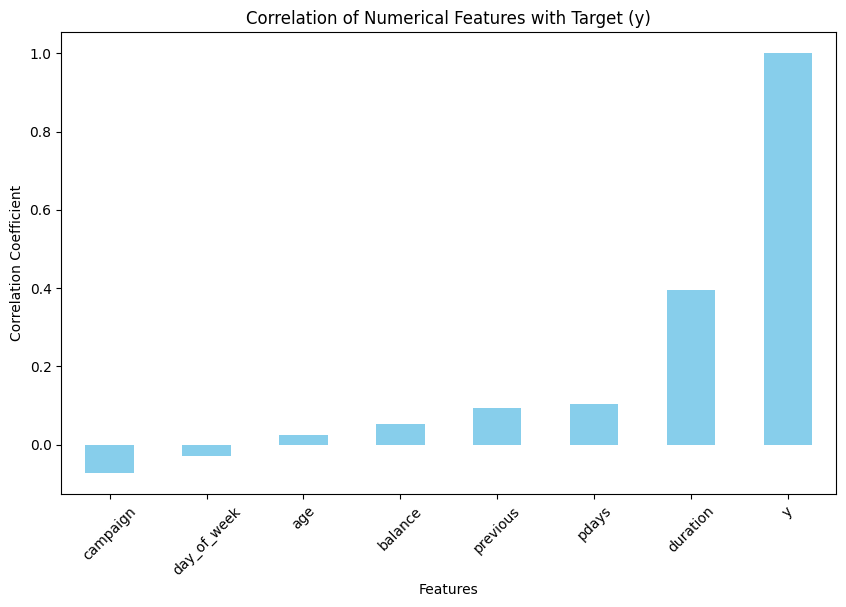

Feature: job, Chi-Square Statistic: 836.14, p-value: 0.0000
Feature: marital, Chi-Square Statistic: 196.50, p-value: 0.0000
Feature: education, Chi-Square Statistic: 233.75, p-value: 0.0000
Feature: default, Chi-Square Statistic: 22.20, p-value: 0.0000
Feature: housing, Chi-Square Statistic: 874.82, p-value: 0.0000
Feature: loan, Chi-Square Statistic: 209.62, p-value: 0.0000
Feature: contact, Chi-Square Statistic: 4.59, p-value: 0.0321
Feature: month, Chi-Square Statistic: 3061.84, p-value: 0.0000
Feature: poutcome, Chi-Square Statistic: 1822.20, p-value: 0.0000


<ipython-input-3-2609423a079a>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='y', data=data, ci=None)


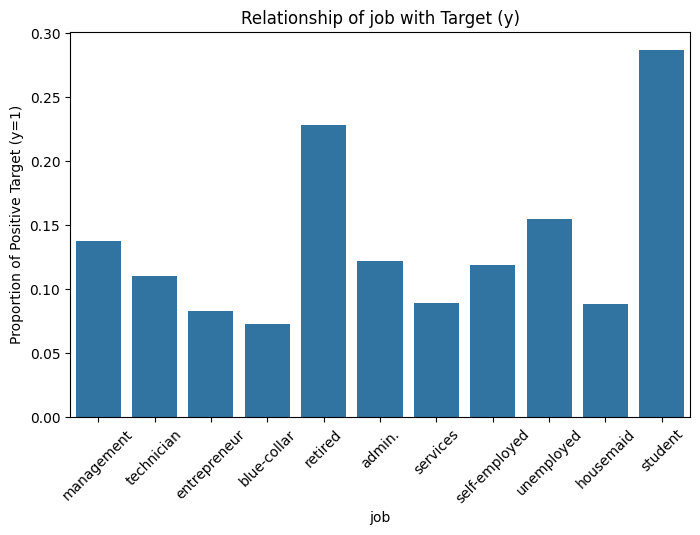

<ipython-input-3-2609423a079a>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='y', data=data, ci=None)


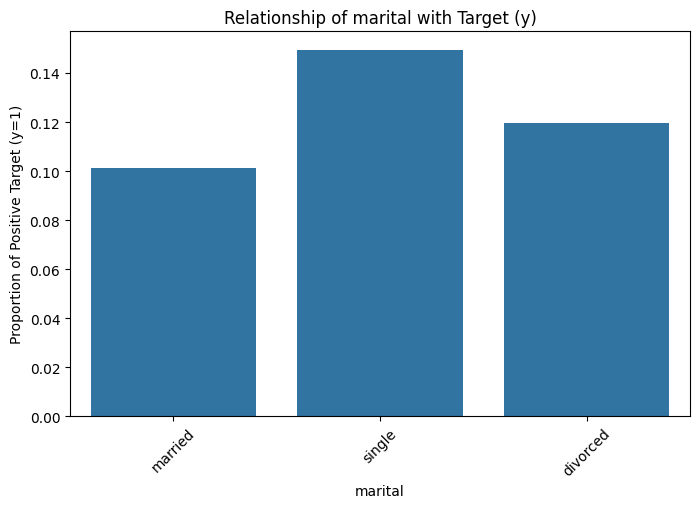

<ipython-input-3-2609423a079a>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='y', data=data, ci=None)


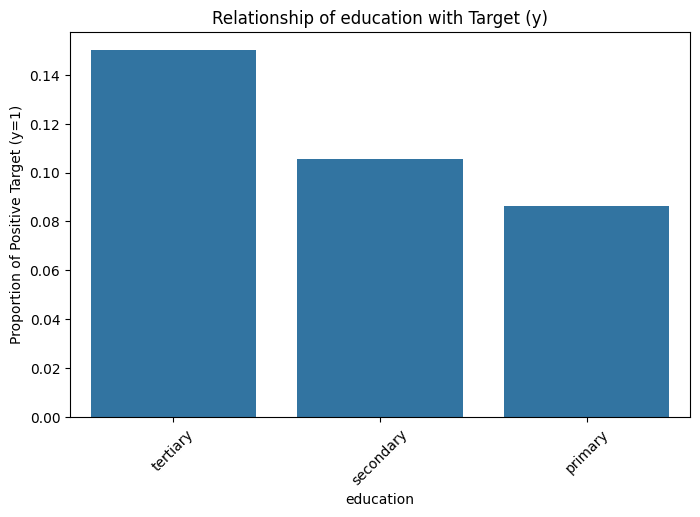

<ipython-input-3-2609423a079a>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='y', data=data, ci=None)


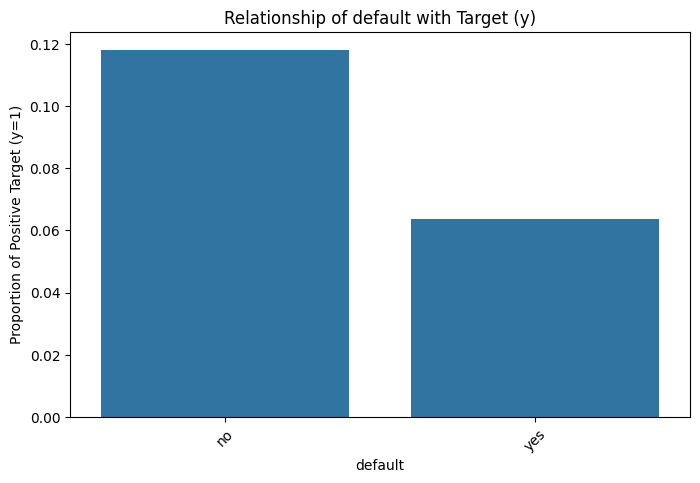

<ipython-input-3-2609423a079a>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='y', data=data, ci=None)


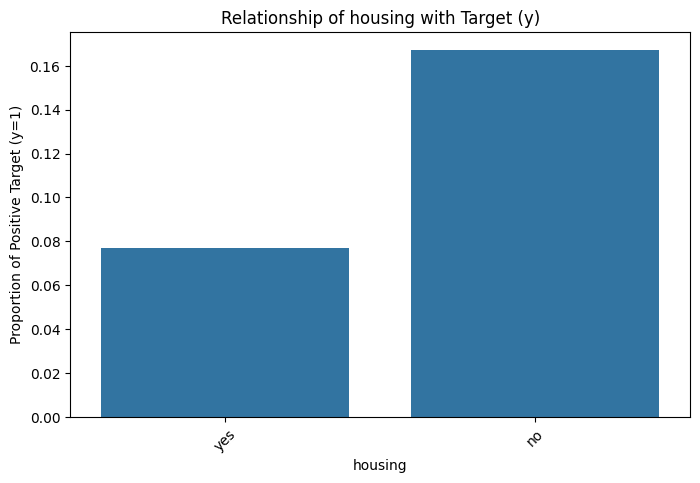

<ipython-input-3-2609423a079a>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='y', data=data, ci=None)


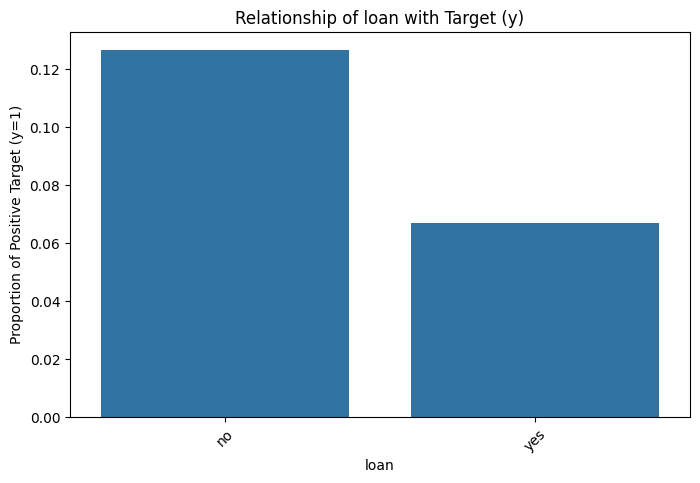

<ipython-input-3-2609423a079a>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='y', data=data, ci=None)


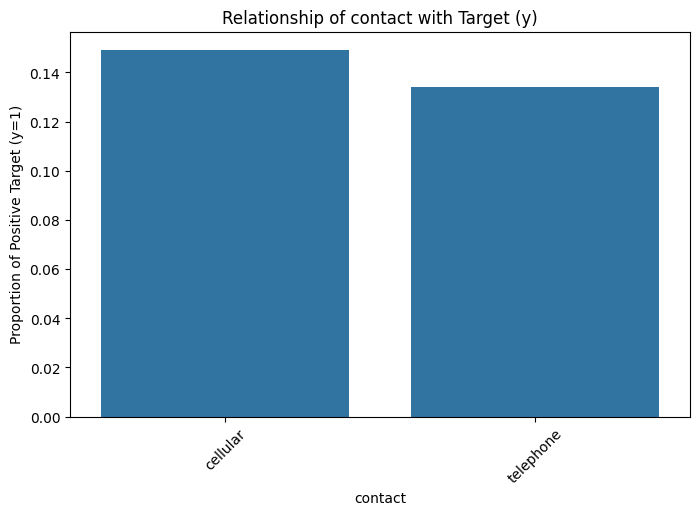

<ipython-input-3-2609423a079a>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='y', data=data, ci=None)


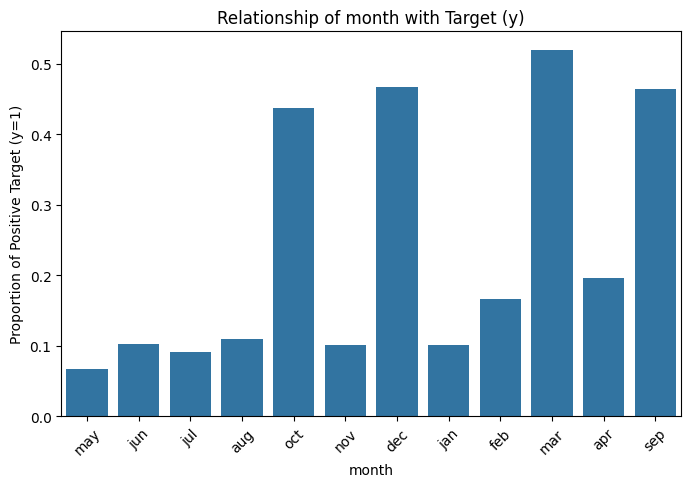

<ipython-input-3-2609423a079a>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='y', data=data, ci=None)


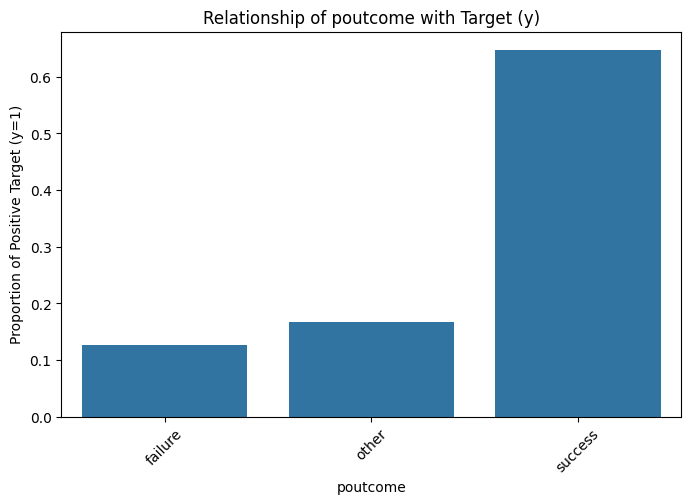

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Step 1: Load the Dataset
from ucimlrepo import fetch_ucirepo
bank_marketing = fetch_ucirepo(id=222)

# Combine features and target
X = bank_marketing.data.features
y = bank_marketing.data.targets
data = pd.concat([X, y], axis=1)

# Convert target variable to binary (1 = yes, 0 = no)
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Step 2: Separate Numerical and Categorical Features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

# Step 3: Correlation Analysis for Numerical Features
# Compute correlation matrix
correlation_matrix = data[numerical_features].corrwith(data['y']).sort_values()

# Plot correlation of numerical features with the target
plt.figure(figsize=(10, 6))
correlation_matrix.plot(kind='bar', color='skyblue')
plt.title("Correlation of Numerical Features with Target (y)")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

# Step 4: Correlation Analysis for Categorical Features
# Chi-Square Test for each categorical feature
for col in categorical_features:
    contingency_table = pd.crosstab(data[col], data['y'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Feature: {col}, Chi-Square Statistic: {chi2:.2f}, p-value: {p:.4f}")

# Visualize relationships of categorical features with the target
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='y', data=data, ci=None)
    plt.title(f"Relationship of {col} with Target (y)")
    plt.ylabel("Proportion of Positive Target (y=1)")
    plt.xticks(rotation=45)
    plt.show()


**Note**: the highest correlation between features and the target variable (y) is around 0.6 and others have lower correlations, it suggests that no single feature strongly predicts the target. In such cases, it's often better to train the model using all available features rather than discarding lower-correlation features prematurely.

Columns in the DataFrame: Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'y_yes', 'y'],
      dtype='object')
X_train shape: (22455, 37), y_train shape: (22455,)
X_test shape: (5614, 37), y_test shape: (5614,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9150 - loss: 1.0584 - val_accuracy: 0.9426 - val_loss: 0.4613
Epoch 2/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9332 - loss: 0.3663 - val_accuracy: 0.8519 - val_loss: 0.5056
Epoch 3/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9408 - loss: 0.3106 - val_accuracy: 0.9731 - val_loss: 0.1259
Epoch 4/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9540 - loss: 0.2289 - val_accuracy: 0.9817 - val_loss: 0.0766
Epoch 5/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9695 - loss: 0.1353 - val_accuracy: 0.9935 - val_loss: 0.0396
Epoch 6/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9723 - loss: 0.1684 - val_accuracy: 0.9704 - val_loss: 0.3166
Epoch 7/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9782 - loss: 0.1236 - val_accuracy: 0.9755 - val_loss: 0.0838
Epoch 8/50
562/562 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9887 - loss: 0.0463 - val_accuracy:

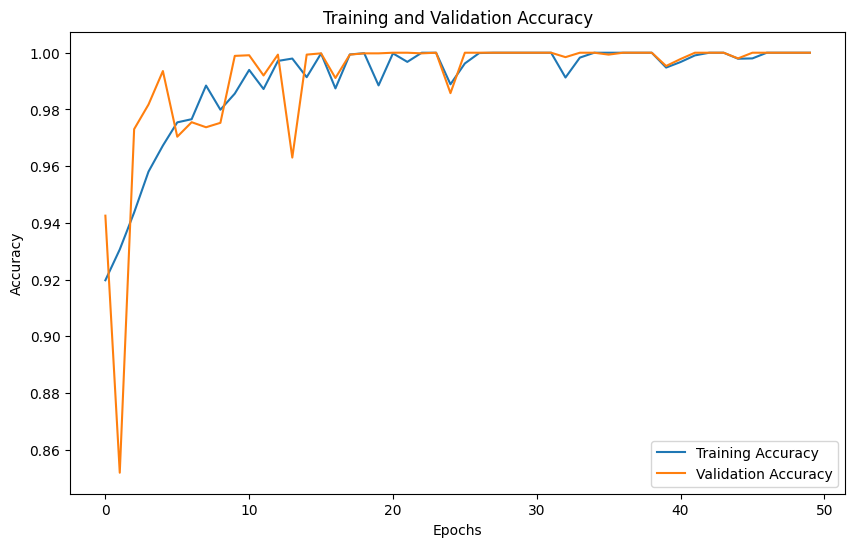

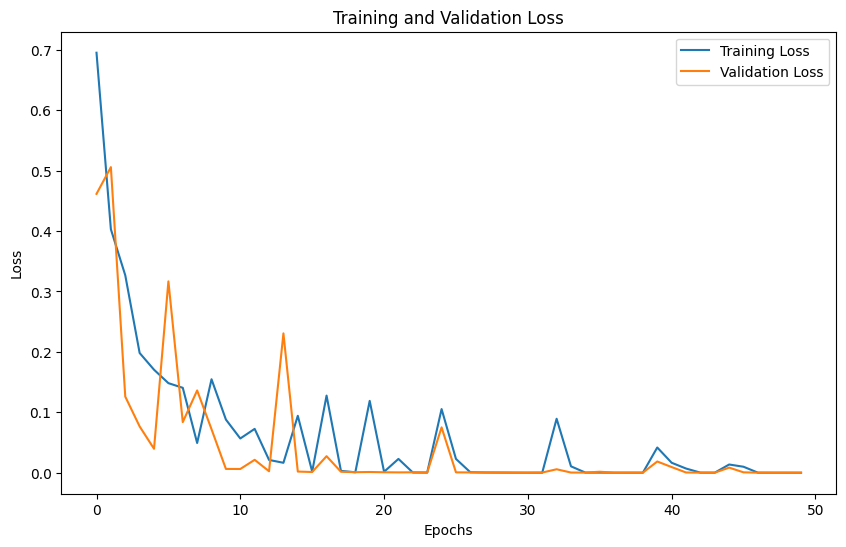

In [ ]:
# Step 1: Prepare the Dataset
# Ensure the target column is identified correctly
print("Columns in the DataFrame:", data.columns)  # Check the available columns

# Set the target column name (replace 'y' if it's different)
target_column = 'y'

# Re-add the target column if it is missing
if target_column not in data.columns:
    print(f"Target column '{target_column}' not found. Adding it back...")
    from ucimlrepo import fetch_ucirepo
    bank_marketing = fetch_ucirepo(id=222)
    data[target_column] = bank_marketing.data.targets

# Verify the target column exists
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' still not found in the DataFrame.")

# Separate features (X) and target (y)
X = data.drop(columns=[target_column])  # Features
y = data[target_column].apply(lambda x: 1 if x == 'yes' else 0)  # Convert to binary (0 or 1)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Convert Data to Numpy Arrays
import numpy as np

X_train = np.array(X_train).astype('float32')  # Convert features to float32
X_test = np.array(X_test).astype('float32')
y_train = np.array(y_train).astype('int32')  # Convert labels to int32
y_test = np.array(y_test).astype('int32')

# Confirm data shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Step 3: Build the Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Step 5: Evaluate the Model
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and classification report
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Visualize Model Performance
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


# New Section